In [3]:
import numpy as np
import pylab as pl
import pandas as pd
%pylab inline
from corner import corner

Populating the interactive namespace from numpy and matplotlib


In [9]:
import os
os.chdir('/Users/yongwan89/PycharmProjects/COM_CosmoParams_fullGrid_R2.00/base/WMAP')

In [10]:
# MCMC chain samples
samples = np.loadtxt('base_WMAP_1.txt')

In [11]:
# load the column names for the samples
column_names_raw = np.loadtxt('base_WMAP.paramnames', dtype=np.str, usecols=[0])
column_names = [x.replace("b'",'').replace("'",'') for x in column_names_raw]

In [12]:
# make a data frame with column names and samples
samples1 = pd.DataFrame(samples[:,2:], columns=column_names) # first two columns are not important

In [16]:
samples1.shape

(8017, 51)

In [17]:
# define which parameters to use
use_params = ['omegam*', 'omegabh2']

<Figure size 432x288 with 0 Axes>

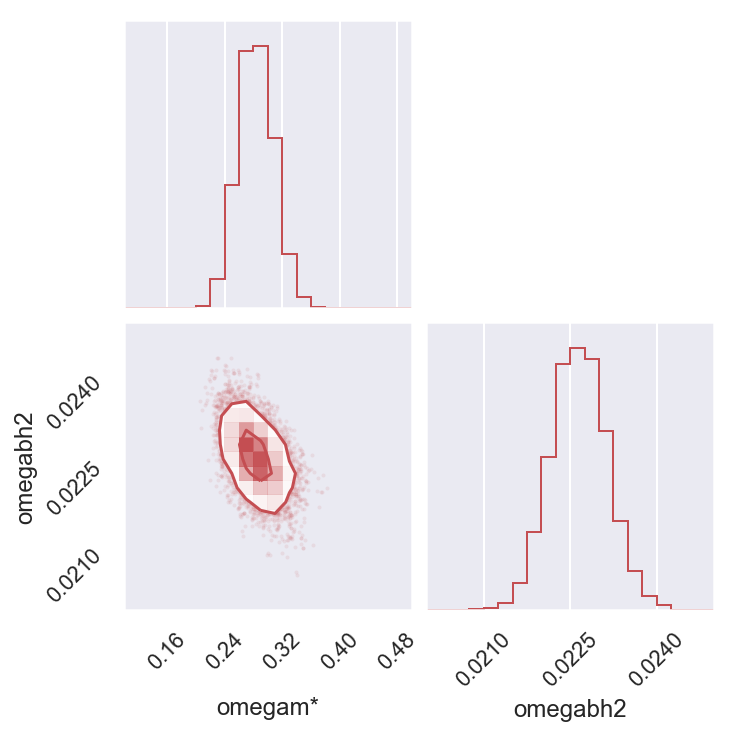

In [18]:
pl.figure()
sigma1 = 1. - exp(-(1./1.)**2/2.)
sigma2 = 1. - exp(-(2./1.)**2/2.)
_=corner(samples1[use_params], range=[(0.1, 0.5), (0.02, 0.025)], bins=20,\
         levels=(sigma1, sigma2), color='r')